In [1]:
# Download data from 
# https://github.com/aaspip/data/blob/main/syn_edge2d.bin
# 
# This data is from 
# Zhou, Y., Li, S., Zhang, D. and Chen, Y., 2020. Seismic noise attenuation using an online subspace tracking algorithm. Geophysical Journal International, 222(3), pp.1765-1788.
# 

from pyseistr import binread

data=binread("syn_edge2d.bin",n1=512,n2=50)

[0, 49] [0, 511]


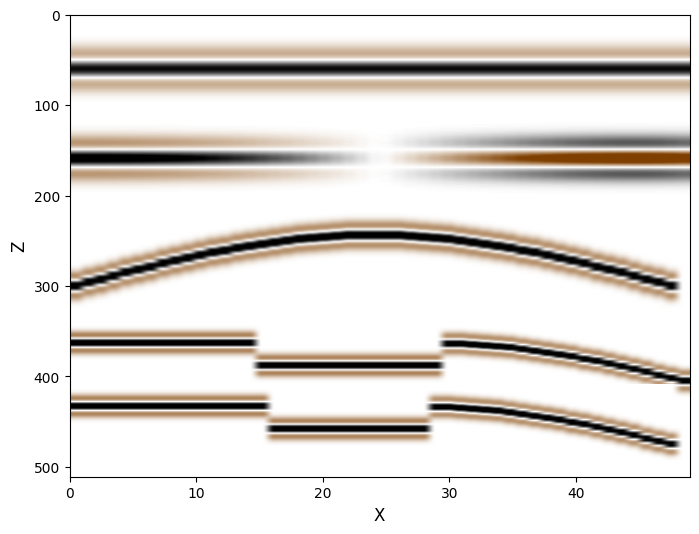

In [2]:
from pyseistr import plot2d

plot2d(data,dx=1,dz=1)

[0, 49] [0, 511]


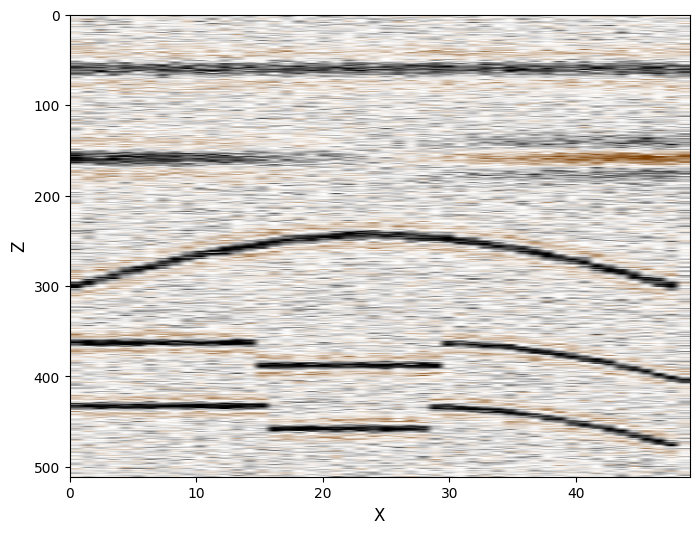

In [3]:
import numpy as np
[n1,n2]=data.shape
seed=202526
var=0.2
np.random.seed(seed)
var=var*np.abs(data).max()
n=var*np.random.randn(n1,n2); #np.random.randn()'s variance is around 1, mean is 0
datan=data+n;

plot2d(datan, dx=1, dz=1)

[0, 49] [0, 511]


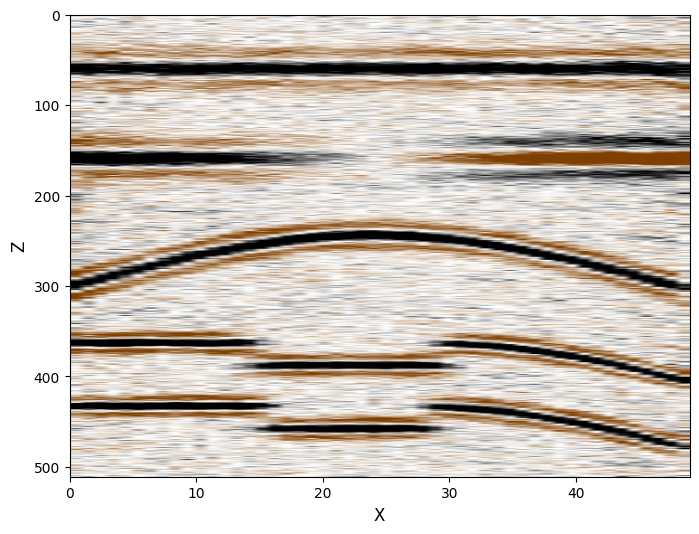

[0, 49] [0, 511]


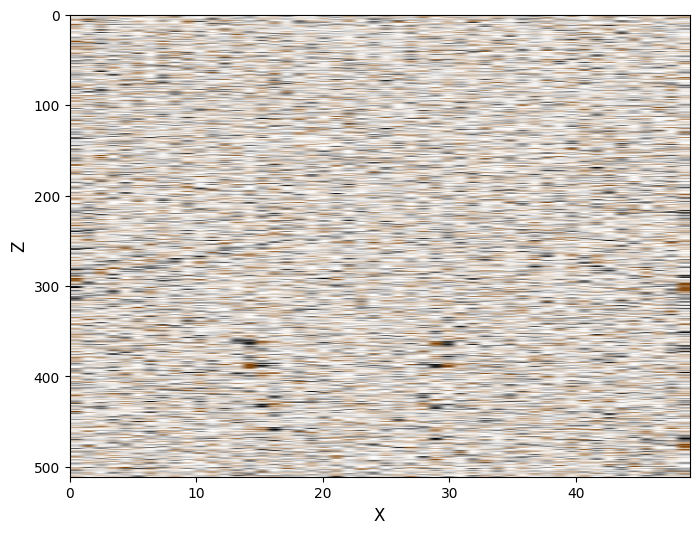

In [4]:
from pydrr import drr3d

d1=drr3d(datan,0,120,0.004,6,4);

plot2d(d1, vmin=-10,vmax=10, dx=1, dz=1)

plot2d(datan-d1, vmin=-10,vmax=10,dx=1, dz=1)

In [5]:
from pyseistr import snr

print('SNR of noisy data:', snr(data,datan, 2))
print('SNR of DRR data (no window):', snr(data,d1))

SNR of noisy data: 1.7414902038403344
SNR of DRR data (no window): 7.443868872188807
